# Normalisation des textes

La normalisation d'un texte a pour objectif de diminuer le "bruit" et à amplifier ce que l'on cherche à écouter. Par bruit, on entend les variations linguistiques qui sont rares ou non nécessaires à considérer pour la tâche que l'on souhaite réaliser.

La **normalisation** d'un texte consiste donc à
- supprimer ce qui est rare ou non porteur de sens et qui apporte du bruit,
- mettre en avant ce qui est porteur de sens en réduisant/unifiant les variantes.

En pratique cela signifie : supprimer les balises  (e.g. _`<div>`_->_∅_), remplacer les variantes d'un mot par une forme référente par expansion systématique des contractions (e.g. _l'_->_le_) ou par lemmatisation ou stemming (e.g. _la_->_le_), supprimer les caractères qui ne sont pas lettres, supprimer les mots vides (e.g. _le_->_∅_), substituer toutes les occurrences d'hashtags par un unique token `#hashtag`, également pour les urls...

Suivant la tâche, on peut s'intéroger si la normalisation doit aussi **corriger** les mots mal orthographiés ou les répétitions de caractères qu'ils soient alphabétiques ou autres. En effet la répétition d'une même lettre ou d'un caractère de ponctuation peut marquer l'emphase dans un propos e.g. "suuuuuuuuuuuper !!!!!".

## Installation de l'environnement : chargement des modèles et des données

Nous utiliserons un corpus de romans de Jules Verne de la littérature française. En pratique le corpus est un répertoire, et les fichiers sont des oeuvres distinctes de Jules Verne. Exécuter le code suivant.

In [1]:
# get the corpus and install in local
!mkdir data
!wget -nc https://raw.githubusercontent.com/nicolashernandez/teaching_nlp/main/data/JulesVerne.zip -P data
!unzip data/JulesVerne.zip -d data

--2023-09-12 11:11:53--  https://raw.githubusercontent.com/nicolashernandez/teaching_nlp/main/data/JulesVerne.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1822113 (1.7M) [application/zip]
Saving to: ‘data/JulesVerne.zip’

JulesVerne.zip      100%[===================>]   1.74M  --.-KB/s    in 0.07s   

2023-09-12 11:11:54 (26.3 MB/s) - ‘data/JulesVerne.zip’ saved [1822113/1822113]

Archive:  data/JulesVerne.zip
   creating: data/JulesVerne/
  inflating: data/JulesVerne/Jules Verne_Les tribulations d'un chinois en Chine.txt  
  inflating: data/JulesVerne/Jules Verne_Voyage au centre de la Terre.txt  
  inflating: data/JulesVerne/Jules Verne_20000 Lieues sous les mers.txt  
  inflating: data/JulesVerne/Jules Verne_Le tour du monde en quatre-vingts jours.

Dans le cadre de ce travail nous utiliserons un seul roman (fichier) à savoir _20000 Lieues sous les mers_. Le code suivant permet de vérifier le contenu du fichier ainsi que de définir des variables qui seront utilisées par la suite pour illustrer le fonctionnement des différents codes fournis : `novel_name` et `document`.

In [2]:
# have a look at a sample of one particular file
novel_path = "data/JulesVerne/Jules Verne_20000 Lieues sous les mers.txt"

import regex as re
novel_name = re.search("_(.+)\.txt", novel_path).group(1)
print (novel_name, novel_path)

with open(novel_path, encoding='utf8') as f:
  document = f.read()
  print (document[:1000])

20000 Lieues sous les mers data/JulesVerne/Jules Verne_20000 Lieues sous les mers.txt
20000 Lieues sous les mers

                              JULES VERNE
                          VINGT MILLE LIEUES
                                  SOUS
                                LES MERS
                              ILLUSTRE DE
                      111 DESSINS PAR DE NEUVILLI
                              BIBLIOTHEQUE
                      D'EDUCATION ET DE RECREATION
                     J. HETZEL ET Cie, 18 RUE JACOB
                                  PARIS

------------------------------------------------------------------------
                           TABLE DES MATIÈRES

                             PREMIÈRE PARTIE


              I       Un écueil fuyant

              II      Le pour et le contre

              III     Comme il plaira à monsieur

              IV      Ned Land

              V       À l'aventure !

              VI      À toute vapeur

              VII     Une balei

## Mots vides

### QUESTION

* Executer le code ci-dessous pour vérifier que la liste de mots vides de nltk pour le français contient bien que des mots vides. Y-a-t-il des mots "non porteur de sens" que vous auriez pensé retrouver ?

In [3]:
import nltk
nltk.download('stopwords')
# retrieve a list of french stop words
fr_stop_words = nltk.corpus.stopwords.words('french')
print ('fr_stop_words:',fr_stop_words)

fr_stop_words: ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### VOTRE REPONSE

**TODO :** Qui ne sont pas dans la liste ?


## Opérations de normalisation

### QUESTION

La méthode ci-dessous prétraite un document (une chaîne de caractère) en réalisant un certain nombre d'opérations de normalisation. Replacer les commentaires suivant au bon endroit dans le code.

```
    # filter tokens with small length
    # tokenize document
    # filter stopwords out of document
    # substitute all characters which are not a whitespace or a letter by a whitespace
    # to lower case
```



### VOTRE REPONSE

In [4]:
import nltk

# the native re module does not handle \p{} unicode property
import regex as re

# define a tokenizer which tokenizes a text by splitting at each whitespace character
ws_tokenizer = nltk.WhitespaceTokenizer()

# normalize a string of text
def normalize_characters(doc):
    # substitute all characters which are not a whitespace or a letter by a whitespace
    doc = re.sub('[^\p{L}\s]', ' ', doc)

    # to lower case
    doc = doc.lower()

    # tokenize document
    return ws_tokenizer.tokenize(doc)

# normalize tokens
def normalize_tokens(tokens):
    # filter stopwords out of document
    tokens = [token for token in tokens if token not in fr_stop_words]

    # filter tokens with small length
    tokens = [token for token in tokens if len(token) >2]

    # re-create document from filtered tokens
    #doc = ' '.join(tokens)
    #return doc
    return tokens

# all in one
def preprocess_document(document):
  return normalize_tokens(normalize_characters(document))


In [ ]:
# le code suivant permet d'illustrer le fonctionnement de la normalisation
sample_document = "Tu pourras (c'est ouf gr!) même goûter au gin de Marina,et mon rhum arrangé!!! 😜🤝🏩🏣👍"
sample_preprocessed_document = normalize_tokens(normalize_characters(sample_document))
print ('document:', sample_document)
print ('preprocessed_document:', sample_preprocessed_document)

## Taille du texte vs. taille de vocabulaire

### QUESTION

Le code suivant prétraite le document sans et avec filtrage de tokens (notamment les mots vides). Pour chaque résultat de prétraitement, le nombre total de tokens et la taille du vocabulaire sont affichés.

* Comparer les tailles de vocabulaire et le nombre total de tokens avant/après filtrage des mots vides de sens. Que traduisent ces chiffres ?

In [5]:
# suppression de certains caractères, passage de tous les caractères en minuscule, tokenization
normalized_characters = normalize_characters(document)
print ('Before filtering - number of tokens:', len(normalized_characters), '; vocabulary size:', len(set(normalized_characters)))

# suppression de certains tokens
normalized_tokens = normalize_tokens(normalized_characters)
print ('After filtering - number of tokens:', len(normalized_tokens), '; vocabulary size:', len(set(normalized_tokens)))

Before filtering - number of tokens: 148921 ; vocabulary size: 14639
After filtering - number of tokens: 78684 ; vocabulary size: 14458


### VOTRE REPONSE

La moitié des tokens composant le document original sont de la ponctuation ou forment des mots supposés non porteurs de sens.

## Vérifier si la loi de Zipf s'applique.

La loi de zipf :

> En classant les mots d’un texte par fréquence décroissante, on observe que la fréquence, `freq(m)`, d’un mot `m` dans un
texte est corrélée à son rang `rang(m)` par une
loi du type : `freq(m) * rang(m) = K` avec `K`
une constante.
Peu de mots fréquents et grand nombre de
mots rares.

La _fréquence d'un mot_ est son _nombre d'occurrence_ sur la somme totale des occurrences de tous les mots. La fréquence constitue une forme de normalisation numérique. Une tendance observée avec le nombre d'occurrences "devrait" être la même que celle observée avec une fréquence.




### QUESTION : mots vides vs. mots porteurs de sens

Le code ci-dessous traite les mots avant filtrage des mots vides. Il utilise la méthode `FreqDist` d'un paquet de nltk pour calculer la fréquence des tokens du corpus d'un des auteurs, puis affiche les `n` tokens les plus _fréquents_ ; on dit aussi les plus _communs_ (`most_common`).

* Exécutez-le. Est-ce bien la fréquence qui est observée ?
* Faire varier le nombre de mots les plus fréquents à observer en jouant avec la variable `most_common_n`. Essayer des valeurs de 10 à 1000.  Quand vous regardez les extrêmes (les plus fréquents vs. les moins fréquents des plus fréquents...), que pouvez-vous dire sur la capacité des mots à décrire un contenu (à donner du sens) ?


In [8]:
# import required libraries
from nltk.probability import FreqDist

# find the frequency
fdist = FreqDist(normalized_characters)

most_common_n = 1000

# print the n most common
print ('Les', most_common_n, 'mots les plus fréquents sont :', fdist.most_common(most_common_n))

Les 1000 mots les plus fréquents sont : [('de', 6316), ('le', 3893), ('et', 3273), ('la', 3222), ('à', 2940), ('l', 2669), ('les', 2592), ('je', 2282), ('des', 2018), ('un', 1822), ('il', 1742), ('d', 1732), ('que', 1609), ('une', 1531), ('en', 1488), ('du', 1428), ('ne', 1300), ('qui', 1279), ('se', 1113), ('nous', 1104), ('ce', 1073), ('dans', 1055), ('pas', 1028), ('au', 950), ('s', 916), ('est', 870), ('par', 833), ('sur', 826), ('capitaine', 751), ('mais', 738), ('plus', 712), ('vous', 712), ('me', 706), ('n', 704), ('ces', 694), ('cette', 663), ('nautilus', 639), ('qu', 630), ('était', 597), ('j', 584), ('pour', 522), ('son', 519), ('a', 491), ('nemo', 485), ('conseil', 481), ('monsieur', 479), ('ned', 454), ('sous', 453), ('c', 451), ('sa', 445), ('avec', 429), ('ses', 412), ('mer', 400), ('comme', 365), ('on', 364), ('si', 359), ('deux', 355), ('m', 351), ('dont', 336), ('lui', 332), ('land', 312), ('avait', 311), ('mon', 310), ('sans', 297), ('quelques', 290), ('leur', 286), (

### VOTRE REPONSE

- Ce qui est observé est le nombre d'ocurrences.
- Les mots les plus fréquents sont les moins porteurs de sens, et inversement ?

### QUESTION : observation de la normalisation des mots les plus communs

Le code suivant trace une courbe de la "fréquence" des mots ordonnée sur le rang de la fréquence.

* Dans le code ci-dessous, rajoutez quelques lignes pour visualiser "aussi" la "fréquence" des mots après normalisation des tokens (i.e. après application de la méthode `normalize_tokens`). Trouvez-vous que la méthode `normalize_tokens` a bien fait son travail ?
* Comment caracterisez-vous la 2nd courbe par rapport à la 1ère ?  

Les 40 mots les plus fréquents sont : [('de', 6316), ('le', 3893), ('et', 3273), ('la', 3222), ('à', 2940), ('l', 2669), ('les', 2592), ('je', 2282), ('des', 2018), ('un', 1822), ('il', 1742), ('d', 1732), ('que', 1609), ('une', 1531), ('en', 1488), ('du', 1428), ('ne', 1300), ('qui', 1279), ('se', 1113), ('nous', 1104), ('ce', 1073), ('dans', 1055), ('pas', 1028), ('au', 950), ('s', 916), ('est', 870), ('par', 833), ('sur', 826), ('capitaine', 751), ('mais', 738), ('plus', 712), ('vous', 712), ('me', 706), ('n', 704), ('ces', 694), ('cette', 663), ('nautilus', 639), ('qu', 630), ('était', 597), ('j', 584)]


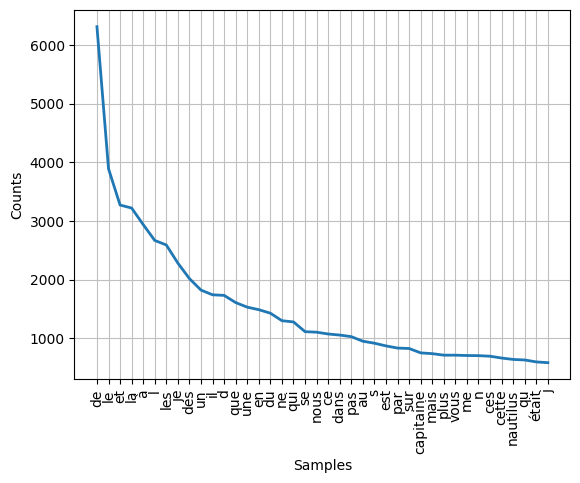

Les 40 mots les plus fréquents sont : [('capitaine', 751), ('plus', 712), ('cette', 663), ('nautilus', 639), ('nemo', 485), ('conseil', 481), ('monsieur', 479), ('ned', 454), ('sous', 453), ('mer', 400), ('comme', 365), ('deux', 355), ('dont', 336), ('land', 312), ('sans', 297), ('quelques', 290), ('dit', 282), ('être', 276), ('tout', 253), ('bien', 246), ('répondit', 236), ('encore', 232), ('canadien', 231), ('vers', 225), ('eaux', 224), ('cet', 217), ('mètres', 208), ('eau', 200), ('peu', 199), ('donc', 198), ('mille', 195), ('heures', 191), ('alors', 185), ('trois', 182), ('après', 180), ('surface', 180), ('très', 178), ('pendant', 175), ('puis', 171), ('entre', 170)]


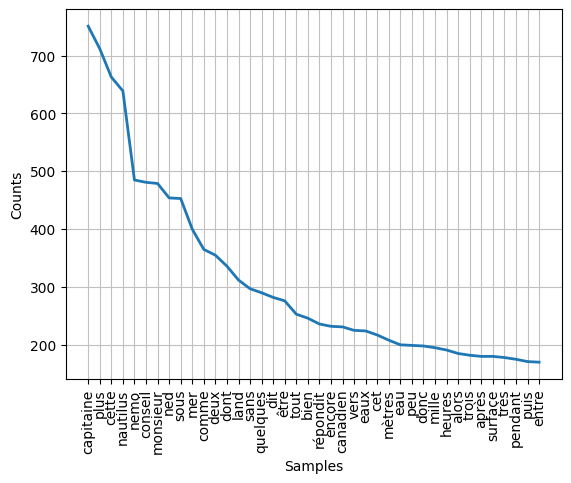

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
# plot the graph of frequency for n most common  :
import matplotlib.pyplot as plt
most_common_n = 40

fdist = FreqDist(normalized_characters)
print ('Les', most_common_n, 'mots les plus fréquents sont :', fdist.most_common(most_common_n))
fdist.plot(most_common_n)

fdist = FreqDist(normalized_tokens)
print ('Les', most_common_n, 'mots les plus fréquents sont :', fdist.most_common(most_common_n))
fdist.plot(most_common_n)

### VOTRE REPONSE

???

La loi de Zipf semble toujours s'appliquer, si c'est ce qui est demandé.

### QUESTION : observation de la fréquence à grande échelle

Le code ci-dessous fait globalement la même chose que ci-dessus mais il offre davantage de contrôle sur le calcul de la fréquence. Cela permet aussi de jouer plus finement avec le traçage de la courbe (qui ici permet de considérer tous les mots et non seulement les plus communs).

* Executez le code et visualizez la courbe. Eventuellement commenter/décommenter les lignes qui vont bien pour passer à une échelle logarithmique et plus aisément observer des valeurs très petites. Est-ce que la loi de Zipf s'applique sur ce document ?
* Remarquez que le code vous permez aussi d'observer la courbe avec le nombre (ou compte) d'occurrences plutôt que la fréquence...

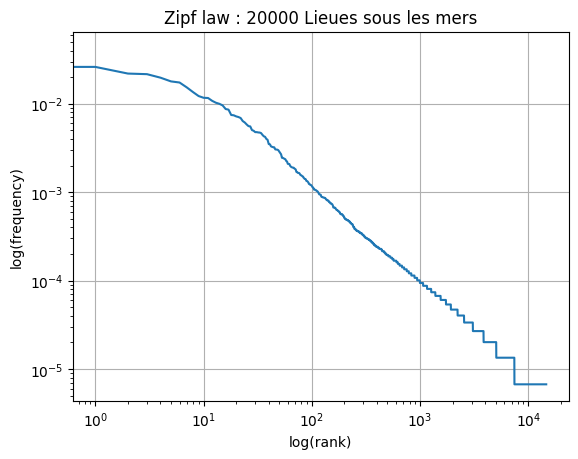

In [11]:
from collections import Counter
# We use reduce to concatenate all the lists in tokenized_author_data, but we don't use "set"
# so that we can count occurencies with a Counter object
# Count the number of occurrences of each token
occurrences_counter = Counter(normalized_characters)

# Formating the counter object to a proper dataset
import pandas as pd
d = pd.DataFrame(occurrences_counter, index=['occurrences']).transpose().reset_index()
d.columns=['word', 'occurrences']

# Computing frequencies instead of occurrences
nb_total = d.occurrences.sum()
d['freq'] = d.occurrences.apply(lambda x: x/nb_total)
# d['freq'] = d.occurences.apply(lambda x: x) # <- nombre d'occurrences

# Sorting by frequency, most frequent word at the top of the df
d = d.sort_values('freq', ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure()
plt.grid()
plt.xscale('log')  # Using log scale
plt.yscale('log')  # Using log scale
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
#plt.xlabel('rank')
#plt.ylabel('frequency')
#plt.ylabel('count')
plt.title("Zipf law : {0}".format(novel_name))
x = list(range(d.shape[0]))
plt.plot(x, d.freq)
plt.show()